Gus Marquez IS687

Captain's ImageAI Object Detection in Video

(Help for these code can be found in ImageAI

  additional graphs in seaborn    numpy and pandas documentation)

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES and SETUP

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SETUP Imports and counters/accumulators

In [6]:
from imageai.Detection import VideoObjectDetection
import os
import time
import calendar
import imutils
from imutils.video import FPS
from imutils.video import VideoStream



carcc = 1; carconf = 1; carplot=[]
personcc = 1; personconf = 1; personplot=[]
motorbikecc = 1; motorbikeconf = 1; motorbikeplot = []
truckcc = 1; truckconf = 1; truckplot = []
xxx=0

Run Detector

In [7]:

#TIMER

current_GMT = time.gmtime()
time_stamp_start = calendar.timegm(current_GMT)
print("Current timestamp:", time_stamp_start)

fps = FPS().start()

#RUN
execution_path = os.getcwd()

# THIS IS THE OPTION FUNCTION FOR IMAGEAI THAT YOU CAN IMPROVISE
# I USE IT FOR COUNTERS AND ACCUMULATORS

def forFrame(frame_number, output_array, output_count):
  global carcc, carconf, personcc, personconf
  global motorbikecc, motorbikeconf, truckcc, truckconf
  #print("FOR FRAME  " , frame_number, "   ++++++++++++++++++++++++++++++++++++++++++++++++++")
  #print("Output for each object : ", output_array)
  #print("Output count for unique objects : ", output_count)
  #print(type(output_array))
  #print(">>>>>", output_array[0])
  #for key,value in output_array[0].items():
	  #print(key, ':', value)

  #  Countes/accumulators
  for item in output_array:
      conf = item.get("percentage_probability")
      flag = item.get("name")
      #print("*****", flag, conf)
      if flag == "car":
        carcc = carcc + 1
        carconf = carconf + conf/100
        carplot.append(conf/100)
      if flag == "person":
        personcc = personcc + 1
        personconf = personconf + conf/100
        personplot.append(conf/100)
      if flag == "motorcycle":
        motorbikecc = motorbikecc + 1
        motorbikeconf = motorbikeconf + conf/100
        motorbikeplot.append(conf/100)
      if flag == "truck":
        truckcc = truckcc + 1
        truckconf = truckconf + conf/100
        truckplot.append(conf/100)

      #print("CAR", carcc, "PERSON", personcc, "MOTORCYCLE", motorbikecc, "TRUCK", truckcc)
      fps.update()
    
   

print("------------END OF A FRAME --------------")

# STANDARD Video Detection in Video code from ImageAI
# YOLOv3 version

detector = VideoObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( os.path.join(execution_path , "/content/drive/MyDrive/colab/yolo.h5"))
detector.loadModel()

video_path = detector.detectObjectsFromVideo(input_file_path=os.path.join(execution_path, "/content/drive/MyDrive/colab/dhaka_traffic_m.mp4"),
                                output_file_path=os.path.join(execution_path, "traffic_detected")
                                , frames_per_second=20, log_progress=True, display_percentage_probability=True, display_object_name=True, per_frame_function=forFrame)



#  ENDING - REPORTS
current_GMT = time.gmtime()
time_stamp_end = calendar.timegm(current_GMT)
print("Start:", time_stamp_start)
print("End:", time_stamp_end)
print("Time:", time_stamp_end - time_stamp_start)



fps.update()
fps.stop()

print("[INFO] elasped time: {:.2f}".format(fps.elapsed()))
print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))

print("///////////// CARtotal ", carcc, carconf, carconf/carcc)
print("///////////// PERSONtotal ", personcc, personconf, personconf/personcc)
print("///////////// MOTORBIKEtotal ", motorbikecc, motorbikeconf, motorbikeconf/motorbikecc)
print("///////////// TRUCKtotal ", truckcc, truckconf, truckconf/truckcc)
print(video_path)

Current timestamp: 1662890314
------------END OF A FRAME --------------
Processing Frame :  1
Processing Frame :  2
Processing Frame :  3
Processing Frame :  4
Processing Frame :  5
Processing Frame :  6
Processing Frame :  7
Processing Frame :  8
Processing Frame :  9
Processing Frame :  10
Processing Frame :  11
Processing Frame :  12
Processing Frame :  13
Processing Frame :  14
Processing Frame :  15
Processing Frame :  16
Processing Frame :  17
Processing Frame :  18
Processing Frame :  19
Processing Frame :  20
Processing Frame :  21
Processing Frame :  22
Processing Frame :  23
Processing Frame :  24
Processing Frame :  25
Processing Frame :  26
Processing Frame :  27
Processing Frame :  28
Processing Frame :  29
Processing Frame :  30
Processing Frame :  31
Processing Frame :  32
Processing Frame :  33
Processing Frame :  34
Processing Frame :  35
Processing Frame :  36
Processing Frame :  37
Processing Frame :  38
Processing Frame :  39
Processing Frame :  40
Processing Frame 

In [8]:
print(len(carplot))

461


In [9]:

pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 33.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.4.1 which is incompatible.
imageai 2.1.6 requires matplotlib==3.3.2, but you have matplotlib 3.1.3 which is incompatible.


{'Cars': 0.8197896141252476, 'Persons': 0.7586218508039859, 'Motobikes': 0.6759993345945473, 'Trucks': 0.6437004931637498}



<BarContainer object of 4 artists>

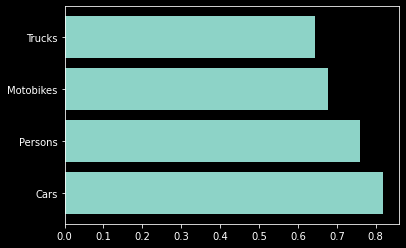

In [10]:

#  PLOT SCORE RESULTS

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

xkeys = ['Cars', 'Persons', 'Motobikes', 'Trucks']
xvalues = [carconf/carcc, personconf/personcc, motorbikeconf/motorbikecc, truckconf/truckcc]
xd = dict(zip(xkeys, xvalues))
print(xd)
print()



group_data = list(xd.values())
group_names = list(xd.keys())
group_mean = np.mean(group_data)

fig, ax = plt.subplots()
ax.barh(group_names, group_data)

In [11]:
print(len(personplot))

1242


In [12]:
#  This part transfer save to be load via drive in ImageAI notebook

from matplotlib import docstring
import numpy as np 
co03ai = carplot # create an array of 1000 1's for the example 
po03ai = personplot
mo03ai = motorbikeplot
to03ai = truckplot
xv03ai = xvalues

np.save('/content/drive/MyDrive/colab/var/co03ai', co03ai)

np.save('/content/drive/MyDrive/colab/var/po03ai', po03ai)
        
np.save('/content/drive/MyDrive/colab/var/mo03ai', mo03ai)
        
np.save('/content/drive/MyDrive/colab/var/to03ai', to03ai)

np.save('/content/drive/MyDrive/colab/var/xv03ai', xv03ai)

In [25]:
#Tranfer timestamp to ImageAI

trans_time = time_stamp_end - time_stamp_start
file = open("/content/drive/MyDrive/colab/var/transtime03ai.txt", "w")
str = repr(trans_time)
file.write(str)
file.close()


In [13]:
#This is for future test without running all
#  LOAD RESULTS FROM OPENCV

import numpy as np
import matplotlib.pyplot as plt

carplot = np.load('/content/drive/MyDrive/colab/var/co03ai.npy') 

pensonplot = np.load('/content/drive/MyDrive/colab/var/po03ai.npy') 

miotorbikeplot = np.load('/content/drive/MyDrive/colab/var/mo03ai.npy') 

truckplot = np.load('/content/drive/MyDrive/colab/var/to03ai.npy') 

xvalues = np.load('/content/drive/MyDrive/colab/var/xv03ai.npy') 


In [14]:
#  LOAD RESULTS FROM OPENCV

import numpy as np
import matplotlib.pyplot as plt

ci = np.load('/content/drive/MyDrive/colab/var/co03cv.npy') 

pi = np.load('/content/drive/MyDrive/colab/var/po03cv.npy') 

mi = np.load('/content/drive/MyDrive/colab/var/mo03cv.npy') 

ti = np.load('/content/drive/MyDrive/colab/var/to03cv.npy') 

xi = np.load('/content/drive/MyDrive/colab/var/xv03cv.npy') 


In [15]:
print(xi)

[0.77287437 0.62977332 0.52503428 0.63316183]


BELOW WILL PLOT ALL DETECTIONS FROM OpenCV (CV) and ImageAI  (AI)


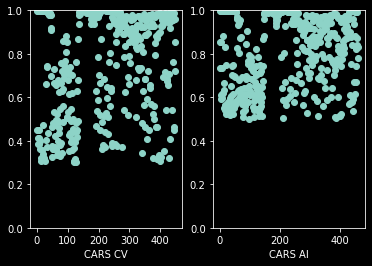

In [16]:

x1 = np.array(range(0, len(ci)))
y1 = ci

x2 = np.array(range(0, len(carplot)))
y2 = carplot

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.xlabel("CARS CV")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.xlabel("CARS AI")
plt.ylim([0,1])

plt.show()

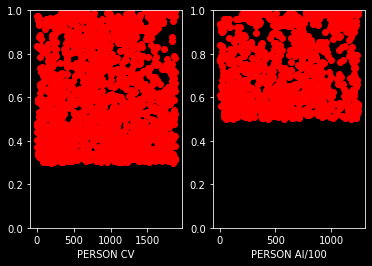

In [17]:

x1 = np.array(range(0, len(pi)))
y1 =pi

x2 = np.array(range(0, len(personplot)))
y2 = personplot

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color = "red")
plt.xlabel("PERSON CV")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color = "red")
plt.xlabel("PERSON AI/100")
plt.ylim([0,1])

#plt.legend(["blue", "green"], loc ="lower right")

plt.show()

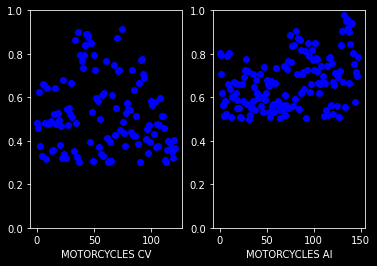

In [18]:

x1 = np.array(range(0, len(mi)))
y1 = mi

x2 = np.array(range(0, len(motorbikeplot)))
y2 = motorbikeplot

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color = "blue")
plt.xlabel("MOTORCYCLES CV")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color = "blue")
plt.xlabel("MOTORCYCLES AI")
plt.ylim([0,1])

plt.show()

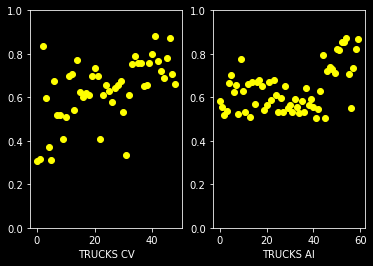

In [19]:

x1 = np.array(range(0, len(ti)))
y1 = ti

x2 = np.array(range(0, len(truckplot)))
y2 = truckplot

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, color = "yellow")
plt.xlabel("TRUCKS CV")
plt.ylim([0,1])

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, color = "yellow")
plt.xlabel("TRUCKS AI")
plt.ylim([0,1])

plt.show()

ANALYSIS and FINDINGS REPORTS

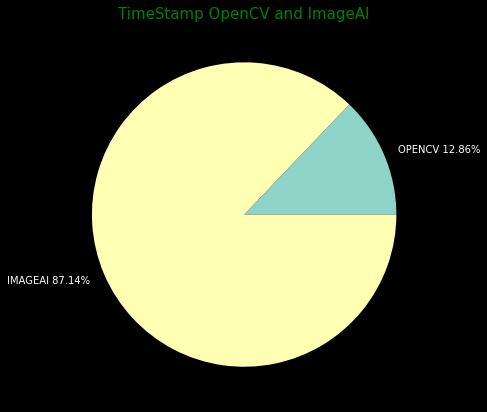

In [20]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('dark_background')
 
#get timestamp from OpenCV
# open the data file
file = open("/content/drive/MyDrive/colab/var/transtime03ai.txt")
# read the file as a list
data = file.readlines()
# close the file
file.close()
cvtime = int(data[0])



# Get ImageAI timestamp , mix and repot

aitime = time_stamp_end - time_stamp_start
 
# Creating dataset

totratio = cvtime + aitime
tcvout = "OPENCV "+str(round(cvtime/totratio*100,2))+"%"
taiout = "IMAGEAI "+str(round(aitime/totratio*100,2))+"%"

libTime = [tcvout, taiout]
 
data = [cvtime, aitime]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = libTime)
plt.title(label="TimeStamp OpenCV and ImageAI",
          fontsize=15,
          color="green")

 
# show plot
plt.show()

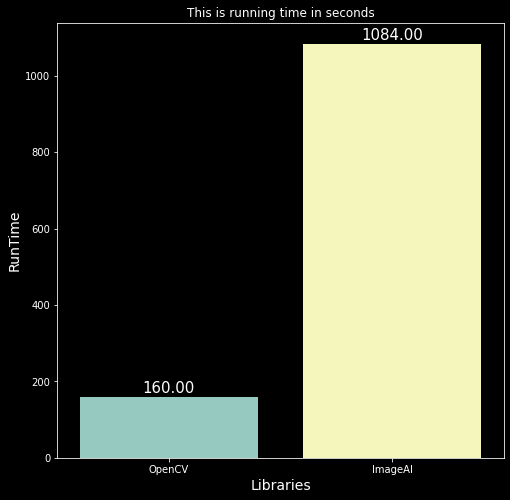

In [21]:
#  This is where the total of both is displayed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



data = {"Libraries": ["OpenCV", "ImageAI"],
		"RunTime": [cvtime, aitime]}
df = pd.DataFrame(data, columns=['Libraries', 'RunTime'])
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Libraries", y="RunTime", data=df)
for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')
plt.xlabel("Libraries", size=14)
plt.ylabel("RunTime", size=14)
plt.title("This is running time in seconds")
plt.show()



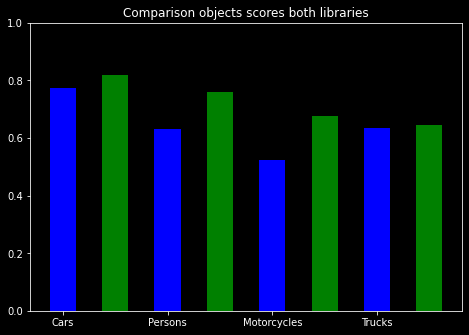

In [22]:
import numpy as np
import matplotlib.pyplot as plt
xt = ["Cars", "Persons", "Motorcycles", "Trucks"]

data = [[xi[0], xi[1], xi[2], xi[3]],
[carconf/carcc, personconf/personcc, motorbikeconf/motorbikecc, truckconf/truckcc]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(xt, data[0], color = 'b', width = 0.25)
ax.bar(X+0.50, data[1], color = 'g', width = 0.25)
ax.set_ylim([0, 1])
plt.title("Comparison objects scores both libraries")

plt.show()

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Calculating subtotals

totalcv = ((xi[0] + xi[1] + xi[2] + xi[3]))/4

totalai = (carconf/carcc + personconf/personcc + motorbikeconf/motorbikecc + truckconf/truckcc)/4

print(totalcv, totalai)

0.6402109503397866 0.7245278231718827


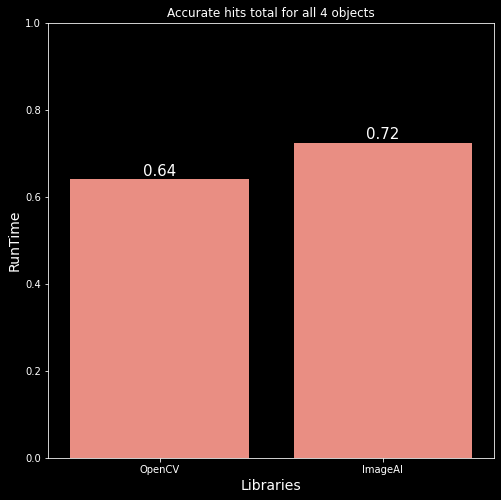

In [24]:
#  Another plot for the total of accurate hits for 4 objects
data = {"Libraries": ["OpenCV", "ImageAI"],
		"RunTime": [totalcv, totalai]}
df = pd.DataFrame(data, columns=['Libraries', 'RunTime'])
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Libraries", y="RunTime", data=df, color = "salmon")
for bar in plots.patches:
	plots.annotate(format(bar.get_height(), '.2f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				size=15, xytext=(0, 8),
				textcoords='offset points')
plt.xlabel("Libraries", size=14)
plt.ylabel("RunTime", size=14)
plt.ylim ([0, 1])
plt.title("Accurate hits total for all 4 objects")
plt.show()